# <center> _*Homework 2 - Solution*_ <br> <br> _ERIS AZIZAJ_ <br> <br> October 27, 2018

## Question 1

Your first task will be using exploratory analysis to familiarize with the dataset.
Is the dataset complete? Report useful summary statistics (such as mean value) and plots
(such as boxplots or histograms) to help the reader understand more details about the dataset
(e.g. show 5 states with the highest and lowest crime rate)

**Answer:** The dataset is complete. I am showing the mean, median, min and max values of
all variables in order to have a better understanding of the dataset.

In [1]:
#read the data
crime <- read.csv("CrimeStats2016.csv", stringsAsFactors = F)


In [2]:
#lest check the structure of the data
str(crime)


'data.frame':	52 obs. of  20 variables:
 $ State                                      : chr  "     Alabama" "     Alaska" "     Arizona" "     Arkansas" ...
 $ Population                                 : num  4863300 741894 6931071 2988248 39250017 ...
 $ Violent.crime                              : num  25886 5966 32583 16461 174796 ...
 $ Violent.crime.Rate                         : num  532 804 470 551 445 ...
 $ Murder.and..nonnegligent..manslaughter     : num  407 52 380 216 1930 ...
 $ Murder.and..nonnegligent..manslaughter.Rate: num  8.4 7 5.5 7.2 4.9 3.7 2.2 5.9 20.4 5.4 ...
 $ Rape.                                      : num  1916 1053 3290 2143 13702 ...
 $ Rape.Rate                                  : num  39.4 141.9 47.5 71.7 34.9 ...
 $ Robbery                                    : num  4686 850 7055 2120 54789 ...
 $ Robbery.Rate                               : num  96.4 114.6 101.8 70.9 139.6 ...
 $ Aggravated.assault                         : num  18877 4011 21858 11982 

In [3]:
#lest pull out the summary stat
crime$State <- as.factor(crime$State)
summary(crime)

             State      Population       Violent.crime    Violent.crime.Rate
      Alabama   : 1   Min.   :  585501   Min.   :   989   Min.   : 123.8    
      Alaska    : 1   1st Qu.: 1794112   1st Qu.:  6409   1st Qu.: 249.6    
      Arizona   : 1   Median : 4265220   Median : 17054   Median : 370.2    
      Arkansas  : 1   Mean   : 6279593   Mean   : 24821   Mean   : 391.0    
      California: 1   3rd Qu.: 7020303   3rd Qu.: 29211   3rd Qu.: 461.8    
      Colorado  : 1   Max.   :39250017   Max.   :174796   Max.   :1205.9    
 (Other)        :46                                                         
 Murder.and..nonnegligent..manslaughter
 Min.   :  14.00                       
 1st Qu.:  67.25                       
 Median : 220.00                       
 Mean   : 344.79                       
 3rd Qu.: 498.75                       
 Max.   :1930.00                       
                                       
 Murder.and..nonnegligent..manslaughter.Rate     Rape.          

It is not intuitive to focus on the numbers without taking into consideration the population of
each state, so because of this reason I will use only the rate variables through the completion
of this assignment. Personally I do value more the value of life than the value of properties.
So, I would prefer to live in a state that has lower violent crime rate than a state that has
lower property crime rate or the best scenario would be living in a state that has both low
rates of violent and property crimes. As we can see from Fig below the most dangerous states
are District of Columbia, Alaska, New Mexico, Nevada, Tennessee and the most peaceful
states are Maine, Vermont, New Hampshire, Virginia, Puerto Rico.

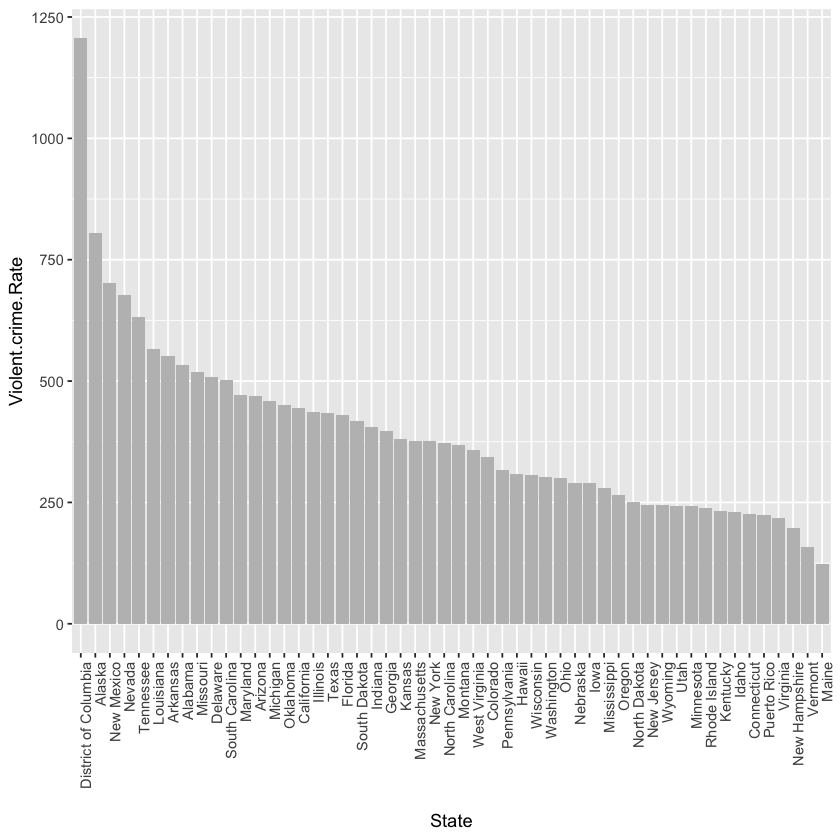

In [5]:
library(ggplot2)
#ploting the violent crime rate in a decreasing order
crime2 <- crime[order(crime$Violent.crime.Rate, decreasing = T),]
crime2$State <- factor(crime2$State, levels = crime2$State[order(crime2$Violent.crime.Rate, decreasing = T)])

ggplot(crime2, aes(x=State, y=Violent.crime.Rate)) +
  geom_bar(stat="identity", fill="gray") +
  theme(axis.text.x = element_text(angle = 90, hjust = 1))

Regarding the property crime rate, Fig. 1 shows that District of Columbia, New Mexico,Washington, Alaska, Louisiana are the states with the highest rates of property crime and Puerto Rico, New Hampshire, New Jersey, New York, Massachusetts are the safest states. As we can see from these two figures, there are some intersections where states are both with the lowes rates of violent and property crimes. So an ideal safe place to live would
be the states of **New Hampshire** and **Puerto Rico**

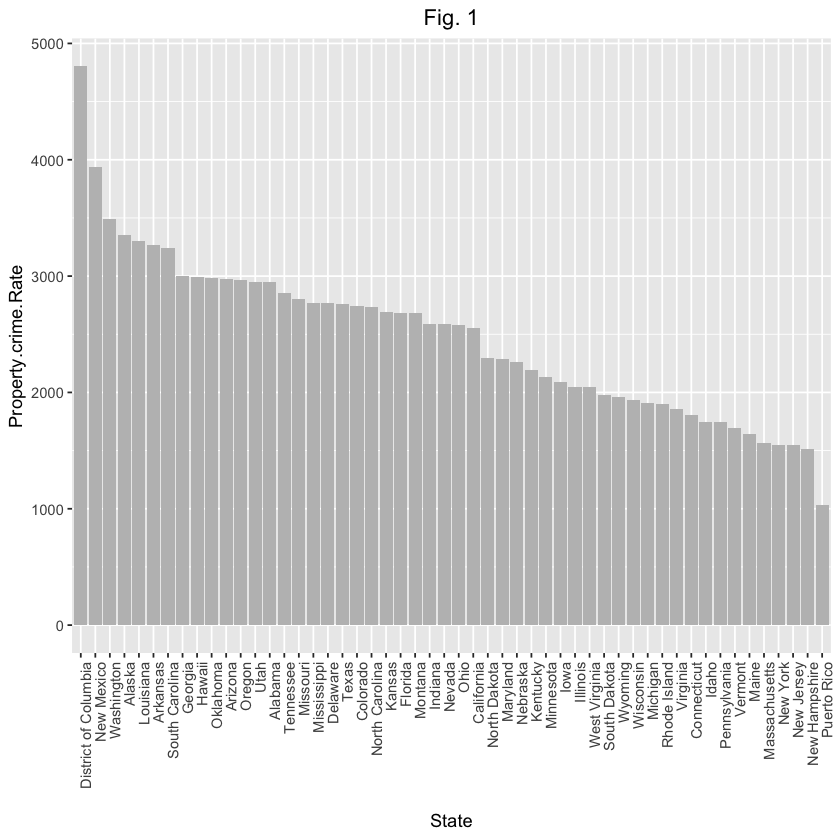

In [6]:
#ploting the property crime rate in a decreasing order
crime3 <- crime[order(crime$Property.crime.Rate, decreasing = T),]
crime3$State <- factor(crime3$State, levels = crime3$State[order(crime3$Property.crime.Rate, decreasing = T)])

ggplot(crime3, aes(x=State, y=Property.crime.Rate)) +
  geom_bar(stat="identity", fill="gray") +
  ggtitle("Fig. 1") +
  theme(axis.text.x = element_text(angle = 90, hjust = 1),
       plot.title = element_text(hjust = 0.5))

Also another useful plot that might help us understand the dataset is the boxplot for all
the rate variables. The following gure shows that violent rate crimes have more similar
distribution, while the property crime rates are more spread. The most spread rate seems
to be Larceny.theft.Rate. It has a median of 1755 with 25th and 75th percentile of value
1419 and 2052 respectively, 50% of the data lie between these two values. Other rates have
smaller ranges.

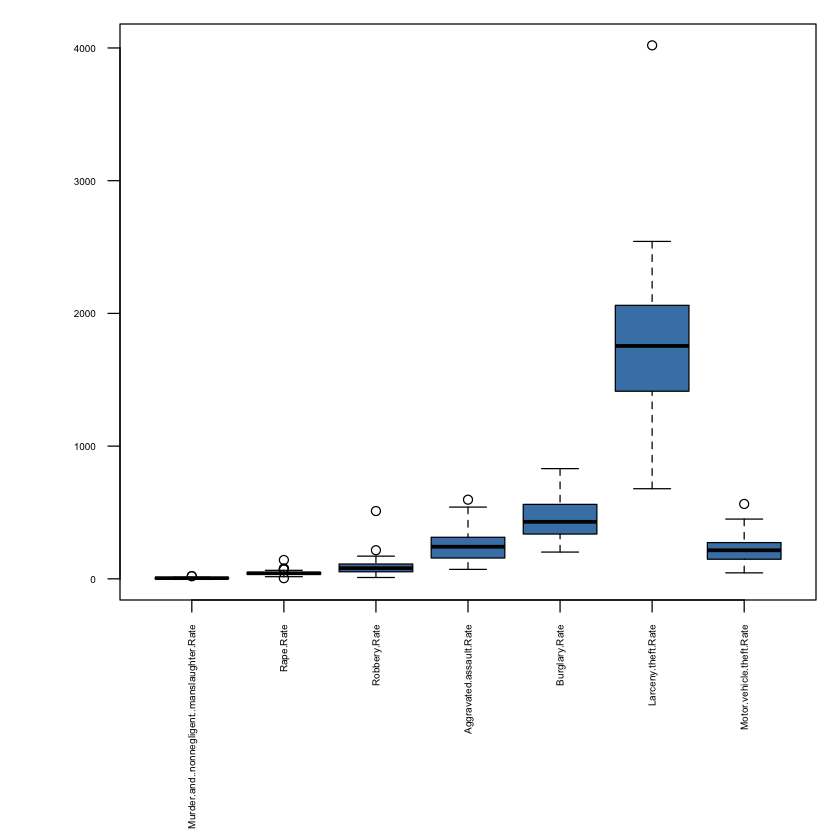

In [7]:
#ploting the crime rates distribution next to each other
par(mar=c(10,5,1,1), cex.axis=0.5, srt=45, xpd = TRUE)
boxplot(crime[,c(6, 8, 10, 12, 16, 18, 20)], col = "steelblue", las=2)

=====================================================================================================================

## Question 2

Next, you will need to prepare your data for clustering. Produce a distance
matrix to represent the distance between each sample (state), explaining what metric you
chose and why. Dont forget to scale your data! You may also decide to exclude some column
from this analysis if you think they are not useful or may be detrimental (explain why).

**Answer:** I am choosing only the rates variable of seven types of crimes because of the
reasons explained in Problem 1. First we have to scale the variables to have mean=0 and sd=1
and then using the dist() function with Euclidean method we find the distance matrix. I am
using Eucledian since all variables are numeric.

In [8]:
#lets compute the distance matrix with euclidean method
vars.to.use <- colnames(crime)[c(6, 8, 10, 12, 16, 18, 20)] # variables used
vars.to.use

#scaling the data to have mean=0 and sd=1
crime_matrix <- scale(crime[,vars.to.use])

#distance matrix
d_matrix <- dist(crime_matrix, method="euclidean") 

[1] "Murder.and..nonnegligent..manslaughter.Rate"
[2] "Rape.Rate"                                  
[3] "Robbery.Rate"                               
[4] "Aggravated.assault.Rate"                    
[5] "Burglary.Rate"                              
[6] "Larceny.theft.Rate"                         
[7] "Motor.vehicle.theft.Rate"

=====================================================================================================================

## Question 3

Use hierarchical clustering (Wards method) to group the data. Show the
resulting dendrogram. By looking at the plot, how many clusters do you suggest are present?

**Answer:** Fig below shows the hierarchical clustering dendrogram. To me it seems that there are
8 clusters. Just by looking at this dendrogram, it seems that District Columbia and Puerto
Rico are two outliers since they form separate clusters on their own meaning that they are
very diferent from each other and the rest of the states. Alaska also form a cluster on its own but still is very similar(close) to Nevada and New Mexico and is far away being an outlier compared to the District of Columbia and Puerto Rico.

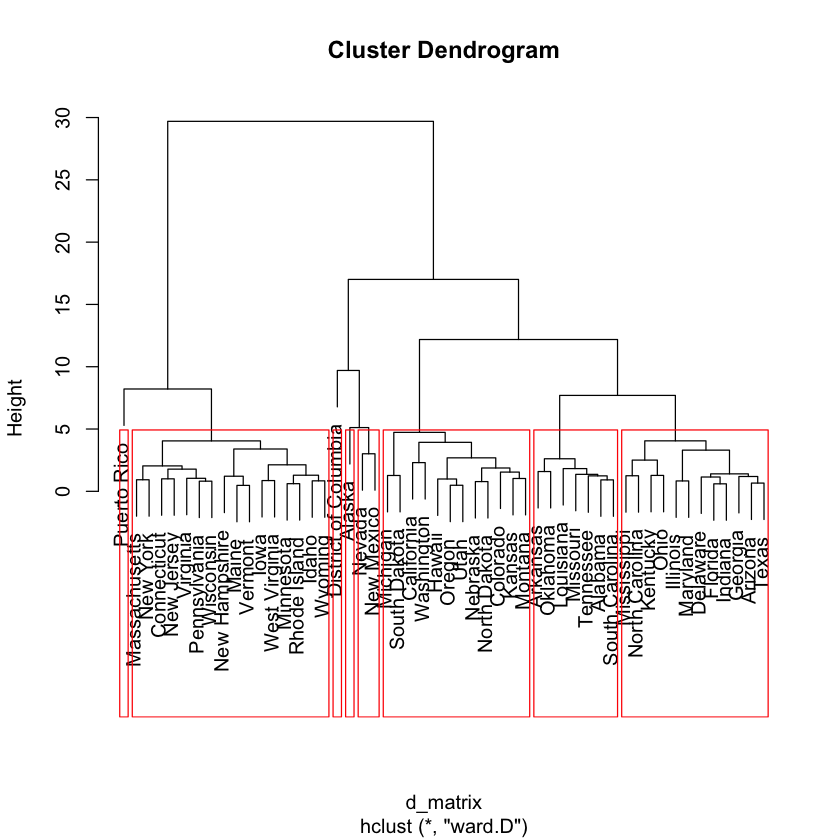

In [9]:
# use hclust() on the distance matrix with method "word.D"
pfit <- hclust(d_matrix, method="ward.D")
plot(pfit, labels=crime$State)

#i suggest # of clusters is 8, i.e k=8
rect.hclust(pfit, k=8)

#lets reset the plot width and height to width=15 and heigh=7
options(repr.plot.width=15, repr.plot.height=7)

=====================================================================================================================

## Question 4

Produce a plot of WSS and Calinski-Harabasz index. According to these
metrics, what seems to be the most adequate number of clusters?

**Answer:** Fig below gives the values of CH and WSS for all possible values of k from 1 to 10.
As we can see from the figure, CH criterion is maximized at k=8, but also have local
maxima at k=3. In order to find the optimal number of clusters from WSS we should look
for an 'elbow' in the curve. It seems that the 'elbow' is at the value k=3 which was also
a local maxima for CH index. The intersection of this two is k=3 so i would prefer k=3 as
the most adequate number of clusters.

Warning message:
“Removed 1 rows containing missing values (geom_point).”Warning message:
“Removed 1 rows containing missing values (geom_path).”

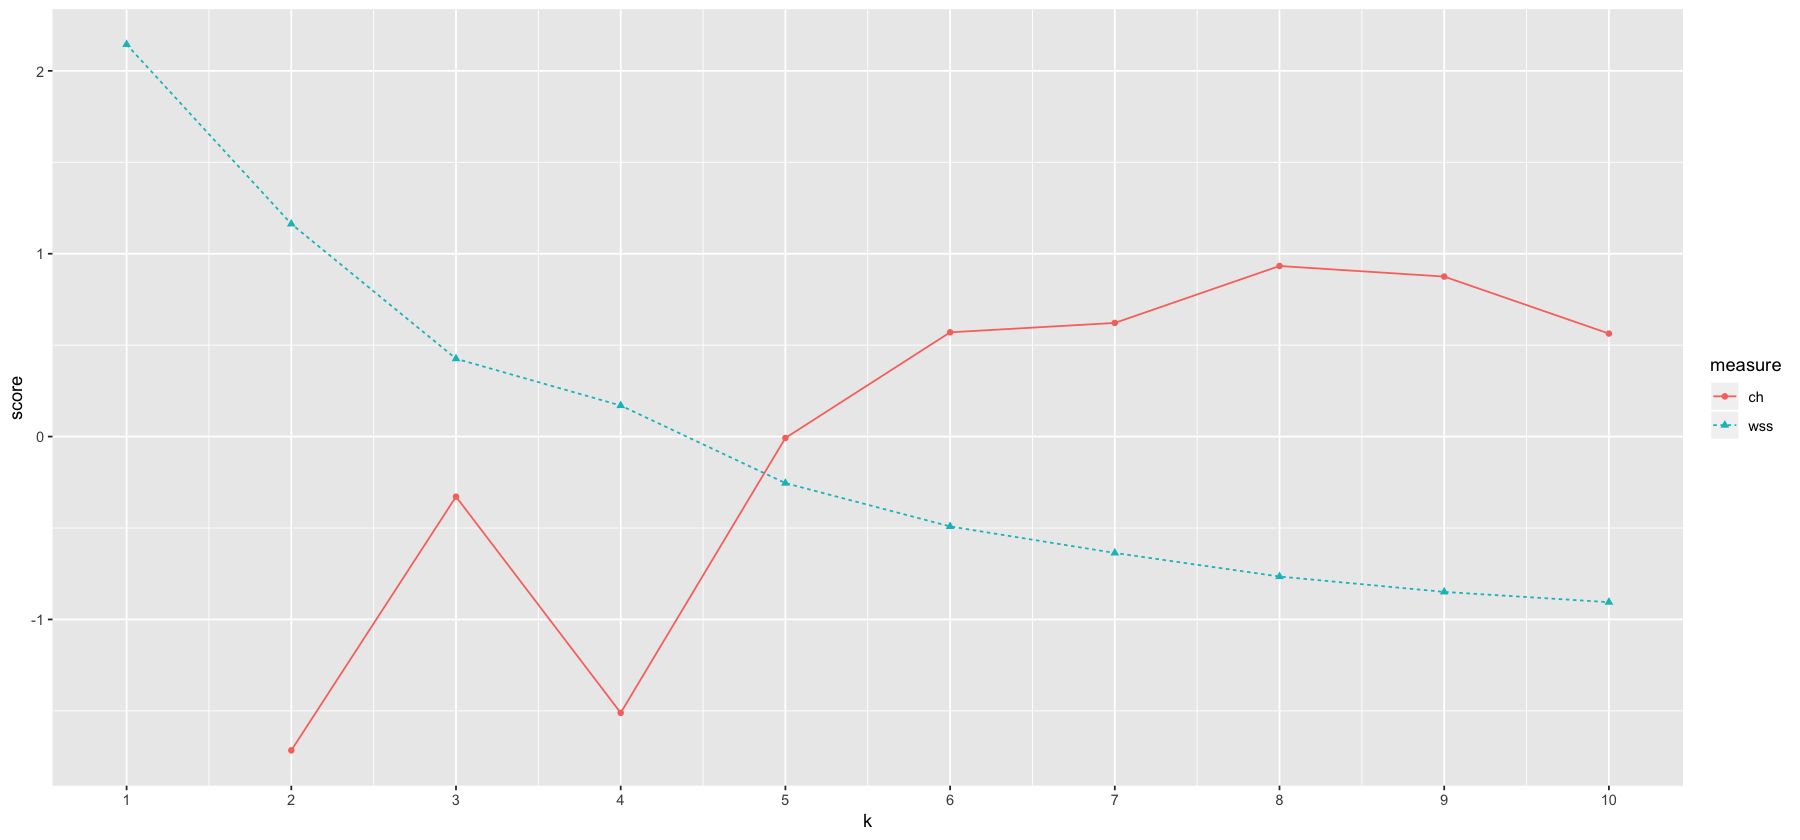

In [12]:
library(reshape2)
library(fpc)

#----------total within sum of square-------------
sqr_edist <- function(x, y) {
  sum((x-y)^2)
}

#within sum of squares per cluster
wss.cluster <- function(clustermat) {
  c0 <- apply(clustermat, 2, FUN=mean) #2 means by column, c0 is the centroid of the cluster
  sum(apply(clustermat, 1, FUN=function(row){sqr_edist(row,c0)})) #1 means by row
}

#total within sum of square WSS
wss.total <- function(dmatrix, labels) {
  wsstot <- 0
  k <- length(unique(labels))
  for(i in 1:k)
    wsstot <- wsstot + wss.cluster(subset(dmatrix, labels==i))
  wsstot
}

#===============Calinski-Harabasz index==============================
#TSS function
totss <- function(dmatrix) {
  grandmean <- apply(dmatrix, 2, FUN=mean)
  sum(apply(dmatrix, 1, FUN=function(row){sqr_edist(row, grandmean)}))
}

#A function to calculate the CH index for a number of clusters from 1 to kmax.
ch_criterion <- function(dmatrix, kmax, method="kmeans") {
  if(!(method %in% c("kmeans", "hclust"))) {
    stop("method must be one of c('kmeans', 'hclust')")
  }
  npts <- dim(dmatrix)[1] # number of rows.
  totss <- totss(dmatrix)
  wss <- numeric(kmax)
  crit <- numeric(kmax)
  wss[1] <- (npts-1)*sum(apply(dmatrix, 2, var))
  for(k in 2:kmax) {
    if(method=="kmeans") {
      clustering<-kmeans(dmatrix, k, nstart=10, iter.max=100)
      wss[k] <- clustering$tot.withinss
    }else { # hclust
      d <- dist(dmatrix, method="euclidean")
      pfit <- hclust(d, method="ward.D")
      labels <- cutree(pfit, k=k)
      wss[k] <- wss.total(dmatrix, labels)
    }
  }
  
  bss <- totss - wss
  crit.num <- bss/(0:(kmax-1))
  crit.denom <- wss/(npts - 1:kmax)
  list(crit = crit.num/crit.denom, wss = wss, totss = totss)
}

#Calculate both criteria for 1–10 clusters.
clustcrit <- ch_criterion(crime_matrix, 10, method="hclust")
critframe <- data.frame(k=1:10, ch=scale(clustcrit$crit),
                        wss=scale(clustcrit$wss))
critframe <- melt(critframe, id.vars=c("k"),
                  variable.name="measure",
                  value.name="score")


ggplot(critframe, aes(x=k, y=score, color=measure)) +
  geom_point(aes(shape=measure)) + geom_line(aes(linetype=measure)) +
  scale_x_continuous(breaks=1:10, labels=1:10)

#lets reset the plot width and height to width=7 and heigh=7
options(repr.plot.width=7, repr.plot.height=4)

=====================================================================================================================

## Question 5

Use results of points 3 and 4 to pick the best number of clusters. Use that
number to do a bootstrap evaluation of cluster stability. Explain your results (what clusters
are more stable? How many times have they been dissolved?). Comment on the different
clusters. what features do they seem to share?

**Answer:** By using bootstrap resampling we evaluate how stable a given cluster is, i.e does
the cluster represent the actual structure in the data, or is it an artifact of the clustering algorithm? I checked the stability numbers (given by `cboot.hclust$bootmean`) and the number of times that the clusters were dissolved (given by `cboot.hclust$bootbrd`) for two different values of $k\in\{3,8\}$.

In [14]:
#lets check where our R-packages are
.libPaths()

[1] "/anaconda3/envs/r-tutorial/lib/R/library"

In [53]:
#install some packages that are not in the jupiter r essentials
install.packages("arules","/anaconda3/envs/r-tutorial/lib/R/library/", repos="http://cran.us.r-project.org")
library(arules)

Updating HTML index of packages in '.Library'
Making 'packages.html' ... done


In [17]:
#Use clusterboot() fnc to evaluate the clustering, i.e how stable the clusters are
#First lets see the stability of 3-clusters
kbest.p<-3

#using hierarchical clustering
#By default clusterboot() runs 100 bootstrap iterations
cboot.hclust <- clusterboot(crime_matrix,clustermethod=hclustCBI,method="ward.D", k=kbest.p, seed=15555) 

#the results of the clustering
summary(cboot.hclust$result) 


boot 1 
boot 2 
boot 3 
boot 4 
boot 5 
boot 6 
boot 7 
boot 8 
boot 9 
boot 10 
boot 11 
boot 12 
boot 13 
boot 14 
boot 15 
boot 16 
boot 17 
boot 18 
boot 19 
boot 20 
boot 21 
boot 22 
boot 23 
boot 24 
boot 25 
boot 26 
boot 27 
boot 28 
boot 29 
boot 30 
boot 31 
boot 32 
boot 33 
boot 34 
boot 35 
boot 36 
boot 37 
boot 38 
boot 39 
boot 40 
boot 41 
boot 42 
boot 43 
boot 44 
boot 45 
boot 46 
boot 47 
boot 48 
boot 49 
boot 50 
boot 51 
boot 52 
boot 53 
boot 54 
boot 55 
boot 56 
boot 57 
boot 58 
boot 59 
boot 60 
boot 61 
boot 62 
boot 63 
boot 64 
boot 65 
boot 66 
boot 67 
boot 68 
boot 69 
boot 70 
boot 71 
boot 72 
boot 73 
boot 74 
boot 75 
boot 76 
boot 77 
boot 78 
boot 79 
boot 80 
boot 81 
boot 82 
boot 83 
boot 84 
boot 85 
boot 86 
boot 87 
boot 88 
boot 89 
boot 90 
boot 91 
boot 92 
boot 93 
boot 94 
boot 95 
boot 96 
boot 97 
boot 98 
boot 99 
boot 100 


              Length Class  Mode     
result         7     hclust list     
noise          1     -none- logical  
nc             1     -none- numeric  
clusterlist    3     -none- list     
partition     52     -none- numeric  
clustermethod  1     -none- character
nccl           1     -none- numeric  

In [18]:
print_clusters <- function(labels, k) {
  for(i in 1:k) {
    print(paste("cluster", i))
    print(crime[labels==i,c("State","Murder.and..nonnegligent..manslaughter.Rate",
                            "Rape.Rate","Robbery.Rate","Aggravated.assault.Rate", "Burglary.Rate",
                            "Larceny.theft.Rate", "Motor.vehicle.theft.Rate")])
  }
}

groups2<-cboot.hclust$result$partition # returns a vector of cluster labels.
print_clusters(groups2, kbest.p) #The clusters are the same as those produced by a direct call to hclust().



[1] "cluster 1"
                 State Murder.and..nonnegligent..manslaughter.Rate Rape.Rate
1              Alabama                                         8.4      39.4
3              Arizona                                         5.5      47.5
4             Arkansas                                         7.2      71.7
5           California                                         4.9      34.9
6             Colorado                                         3.7      64.2
8             Delaware                                         5.9      32.4
10             Florida                                         5.4      36.9
11             Georgia                                         6.6      34.0
12              Hawaii                                         2.5      43.3
14            Illinois                                         8.2      38.3
15             Indiana                                         6.6      37.7
17              Kansas                                      

In [20]:
#The vector of cluster stabilities.
cboot.hclust$bootmean

#The count of how many times each cluster was dissolved. By default clusterboot() runs 100 bootstrap iterations
cboot.hclust$bootbrd 


[1] 0.7700479 0.5349533 0.8168689

[1]  7 58  9

Now lets see the results for optimal k=8

In [21]:
kbest.p<-8

cboot.hclust <- clusterboot(crime_matrix,clustermethod=hclustCBI,method="ward.D", k=kbest.p, seed=15555) #using hierarchical clustering
summary(cboot.hclust$result) #the results of the clustering

print_clusters <- function(labels, k) {
  for(i in 1:k) {
    print(paste("cluster", i))
    print(crime[labels==i,c("State","Murder.and..nonnegligent..manslaughter.Rate",
                            "Rape.Rate","Robbery.Rate","Aggravated.assault.Rate", "Burglary.Rate",
                            "Larceny.theft.Rate", "Motor.vehicle.theft.Rate")])
  }
}

groups2<-cboot.hclust$result$partition # returns a vector of cluster labels.
print_clusters(groups2, kbest.p) #The clusters are the same as those produced by a direct call to hclust().


boot 1 
boot 2 
boot 3 
boot 4 
boot 5 
boot 6 
boot 7 
boot 8 
boot 9 
boot 10 
boot 11 
boot 12 
boot 13 
boot 14 
boot 15 
boot 16 
boot 17 
boot 18 
boot 19 
boot 20 
boot 21 
boot 22 
boot 23 
boot 24 
boot 25 
boot 26 
boot 27 
boot 28 
boot 29 
boot 30 
boot 31 
boot 32 
boot 33 
boot 34 
boot 35 
boot 36 
boot 37 
boot 38 
boot 39 
boot 40 
boot 41 
boot 42 
boot 43 
boot 44 
boot 45 
boot 46 
boot 47 
boot 48 
boot 49 
boot 50 
boot 51 
boot 52 
boot 53 
boot 54 
boot 55 
boot 56 
boot 57 
boot 58 
boot 59 
boot 60 
boot 61 
boot 62 
boot 63 
boot 64 
boot 65 
boot 66 
boot 67 
boot 68 
boot 69 
boot 70 
boot 71 
boot 72 
boot 73 
boot 74 
boot 75 
boot 76 
boot 77 
boot 78 
boot 79 
boot 80 
boot 81 
boot 82 
boot 83 
boot 84 
boot 85 
boot 86 
boot 87 
boot 88 
boot 89 
boot 90 
boot 91 
boot 92 
boot 93 
boot 94 
boot 95 
boot 96 
boot 97 
boot 98 
boot 99 
boot 100 


              Length Class  Mode     
result         7     hclust list     
noise          1     -none- logical  
nc             1     -none- numeric  
clusterlist    8     -none- list     
partition     52     -none- numeric  
clustermethod  1     -none- character
nccl           1     -none- numeric  

[1] "cluster 1"
                 State Murder.and..nonnegligent..manslaughter.Rate Rape.Rate
1              Alabama                                         8.4      39.4
4             Arkansas                                         7.2      71.7
19           Louisiana                                        11.8      38.8
26            Missouri                                         8.8      41.9
37            Oklahoma                                         6.2      52.0
41      South Carolina                                         7.4      48.1
43           Tennessee                                         7.3      40.8
   Robbery.Rate Aggravated.assault.Rate Burglary.Rate Larceny.theft.Rate
1          96.4                   388.2         700.5             2006.3
4          70.9                   401.0         795.5             2233.6
19        119.1                   396.4         740.5             2336.3
26        107.8                   360.8         520.4             1978.4
37 

In [22]:
#The vector of cluster stabilities.
cboot.hclust$bootmean 
cboot.hclust$bootbrd 

[1] 0.8024167 0.6150000 0.7244901 0.6301629 0.7483832 0.6300000 0.6700000
[8] 0.6300000

[1] 22 44 23 32 19 37 43 37

|cluster      |1    |2   |3   |4   |5   |6   |7   |8   |
|-------------|-----|----|----|----|----|----|----|----|
|stability    |0.77 |0.53|0.82|   
|dissolvement |7    |58  |9   |   
|stability    |0.80 |0.62|0.72|0.63|0.75|0.63|0.67|0.63|
|dissolvement |22   | 44 | 23 |32  |19  |37  |43  |37  |

Clusters with a stability value less than 0.6 should be considered *unstable*. Values between
0.6 and 0.75 indicate that the cluster is measuring a pattern in the data, but there is not
high certainty about which points should be clustered together. Clusters with stability
values above about 0.85 can be considered *highly stable* (they are likely to be real clusters).
Unfortunately in our results none of the clusters have a stability higher than 0.85(all range
between 0.53 - 0.82) but we have stability values very close to it. Referring to results above we see
that for k=3 we have higher values of stability and lower number of dissolvement compared
to other options of k. This is not surprising since we are specifying the clustermethod to be
"hclustCBI" in the function clusterboot().
We expect that states in the same cluster have similar features. Cluster 2 states tend to
have high rates of all the crime types but specifically having high Aggravated.assault.Rate
and high Motor.vehicle.theft.Rate compared to other clusters. Cluster 3 has low rates of all
variables specially low Murder.and..nonnegligent..manslaughter.Rate, low Rape.Rate and low
Motor.vehicle.theft.Rate. Cluster 1 has high rates of Murder.and..nonnegligent..manslaughter.Rate
and high Burglary.Rate.
Cluster 2 includes District of Columbia, Nevada, New Mexico and Alaska which are not
very similar with the other as can be seen from the dendrogram. Because of this the stability
value is very low(0.53) and dissolvement rate is high(58). So cluster 1 and 3 are more stable,
while cluster 3 is taking all the states that does not fit anywhere else.

=====================================================================================================================

## Question 6

Use principal component analysis(PCA) to produce a 2-dimensional plot of
the dataset. Are the clusters visible in the plot?

**Answer:** As we can see from Fig 7 District of Columbia and Puerto rico stand far away from
the other states. Alaska and Luisiana also seem to be a little bit of from the other states but
not as much as DC and Puerto Rico. Luisiana was not oobvious from the dendrogram but
according to PCA it stands abit away from the other states. The clusters are not obvious
from this plot.

In [28]:
groups3 <- cutree(pfit, k=3)
print_clusters(groups3, 3)



[1] "cluster 1"
                 State Murder.and..nonnegligent..manslaughter.Rate Rape.Rate
1              Alabama                                         8.4      39.4
3              Arizona                                         5.5      47.5
4             Arkansas                                         7.2      71.7
5           California                                         4.9      34.9
6             Colorado                                         3.7      64.2
8             Delaware                                         5.9      32.4
10             Florida                                         5.4      36.9
11             Georgia                                         6.6      34.0
12              Hawaii                                         2.5      43.3
14            Illinois                                         8.2      38.3
15             Indiana                                         6.6      37.7
17              Kansas                                      

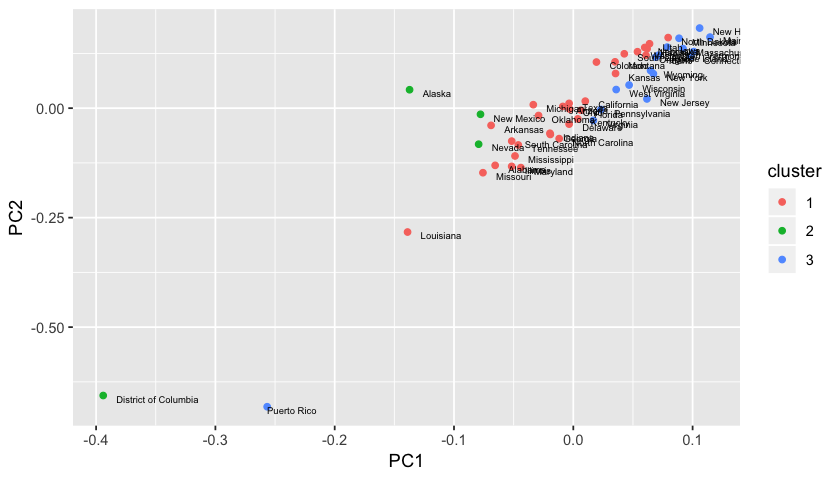

In [29]:
princ <- prcomp(crime_matrix)
nComp <- 2
#The predict() function will rotate the data into the space described by the principal components. We only want the projection on the first two axes.
project <- predict(princ, newdata=crime_matrix)[,1:nComp] 

#Create a data frame with the transformed data, along with the cluster label and country label of each point.
project.plus <- cbind(as.data.frame(project), 
                      cluster=as.factor(groups3),
                      State=crime$State)
#plotting it
ggplot(project.plus, aes(x=PC1, y=PC2)) +
  geom_point(aes(color=cluster)) +
  geom_text(aes(label=State),
            hjust=0, vjust=1, size=2)

=====================================================================================================================

## Question 7

Use k-means and the number of clusters picked above to group the data again.
Comment on the results. Are the cluster the same or there is any visible difference?

**Answer:** In the previous plots of dendrogram and PCA we realized that the DC and Puerto
Rico are outliers. We should exclude them from the k-means since the outliers will pull the
centroids of the clusters towards them and make the resulting clusters not accurate. If we
compare the hierarchical clusters with the ones of k-means we see that some states have
changed cluster. Alaska and New Mexico are in the same cluster while Nevada has moved
to another one. Other states of Illinois, Kentucky, Michigan, Nebraska, North Dakota and
South Dakota also are part of a different cluster. Referring to Fig 8 we see that cluster 2
has high rates of Murder.and..nonnegligent..manslaughter.Rate, high Burglary.Rate and high
Motor.vehicle.theft.Rate. Cluster 3 has generally low rates of almost every variable.

In [36]:
#exclude District of Columbia and Puerto Rico for k means since they are outliers
crime_matrix2 <- crime_matrix[-c(9,52),]
kbest.p=3
crime_clust <- kmeans(crime_matrix2, kbest.p, nstart=100, iter.max=100)
summary(crime_clust) #returns all the sum of squares measures.

#rows are the centroids of the clusters (may appear in different order)
crime_clust$centers  

#returns the number of points(obs) in each cluster
crime_clust$size 


             Length Class  Mode   
cluster      50     -none- numeric
centers      21     -none- numeric
totss         1     -none- numeric
withinss      3     -none- numeric
tot.withinss  1     -none- numeric
betweenss     1     -none- numeric
size          3     -none- numeric
iter          1     -none- numeric
ifault        1     -none- numeric

,Murder.and..nonnegligent..manslaughter.Rate,Rape.Rate,Robbery.Rate,Aggravated.assault.Rate,Burglary.Rate,Larceny.theft.Rate,Motor.vehicle.theft.Rate
1,0.1210619,0.009069403,0.1161448,0.2465715,0.6301837,0.4473903,0.3928968
2,0.3611424,3.251381023,0.4488111,2.2469392,1.3507082,1.3353223,2.2805131
3,-0.5298954,-0.294074500,-0.4431109,-0.5728195,-0.7721627,-0.7504411,-0.7088648


[1] 26  2 22

In [43]:
groups_k_means <- crime_clust$cluster #its a group
crime_cleaned <- crime[-c(9,52),] #exclude DC and Puerto Rico

print_clusters2 <- function(labels, k) {
  for(i in 1:k) {
    print(paste("cluster", i))
    print(crime_cleaned[labels==i,c("State","Murder.and..nonnegligent..manslaughter.Rate",
                            "Rape.Rate","Robbery.Rate","Aggravated.assault.Rate", "Burglary.Rate",
                            "Larceny.theft.Rate", "Motor.vehicle.theft.Rate")])
  }
}

print_clusters2(groups_k_means, kbest.p)

[1] "cluster 1"
                 State Murder.and..nonnegligent..manslaughter.Rate Rape.Rate
1              Alabama                                         8.4      39.4
3              Arizona                                         5.5      47.5
4             Arkansas                                         7.2      71.7
5           California                                         4.9      34.9
6             Colorado                                         3.7      64.2
8             Delaware                                         5.9      32.4
10             Florida                                         5.4      36.9
11             Georgia                                         6.6      34.0
12              Hawaii                                         2.5      43.3
15             Indiana                                         6.6      37.7
17              Kansas                                         3.8      45.1
19           Louisiana                                      

=====================================================================================================================

## Question 8

Use kmeansruns (criteria ch and asw) to produce a new estimate of the number of clusters.
How do they compare to the original one you chose? Comment on the resulting
clusters.

**Answer:** Since kmeansruns uses k-means, for this problem also we are excluding DC and
Puerto Rico. Using kmeansruns() function we have the optimal number of clusters k=2 and
k=3 for "ch" and "asw" criteria, respectively. Also if we compares the values of cluster-
ing.ch$crit and clustcrit$crit we will see that the CH criterion produces different values for
kmeans() and hclust() clusterings.

In [47]:
#use kmeansruns() fnc for picking optimak k
clustering.ch <- kmeansruns(crime_matrix2, krange=1:10, criterion="ch") 
clustering.ch$bestk
summary(clustering.ch)

clustering.asw <- kmeansruns(crime_matrix2, krange=1:10, criterion="asw")
clustering.asw$bestk

critframe <- data.frame(k=1:10, ch=scale(clustering.ch$crit),
                        asw=scale(clustering.asw$crit))

library(reshape2)
critframe <- melt(critframe, id.vars=c("k"), #use melt comand to trasfer the data from wide to long
                  variable.name="measure",
                  value.name="score")

[1] 2

             Length Class  Mode   
cluster      50     -none- numeric
centers      14     -none- numeric
totss         1     -none- numeric
withinss      2     -none- numeric
tot.withinss  1     -none- numeric
betweenss     1     -none- numeric
size          2     -none- numeric
iter          1     -none- numeric
ifault        1     -none- numeric
crit         10     -none- numeric
bestk         1     -none- numeric

[1] 3

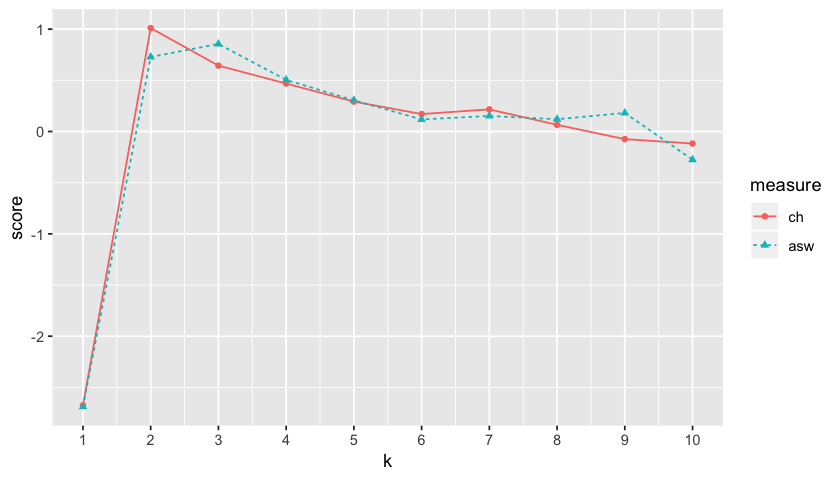

In [48]:
ggplot(critframe, aes(x=k, y=score, color=measure)) +
  geom_point(aes(shape=measure)) + geom_line(aes(linetype=measure)) +
  scale_x_continuous(breaks=1:10, labels=1:10)

=====================================================================================================================

## Question 9

Next, you are going to use Association Rule Mining to find frequent associations between crimes. Since all data is numerical, we will have to bin it and label it. Bin every column into 4 possible levels (Low, Medium, High, Very High). Explain how you chose the binning thresholds. As before, you are allowed to exclude columns from your analysis
(explain why).

**Answer:** I decided to use the rate variables for each crime type since it gives better informa-
tion on the levels of the crimes in each state without having to worry about the population
size. I am binning each variable using the quartiles in order to have a better representation
of the data distribution by having equal frequency binning. It would be wrong to have breaks
argument that are equally spaced because that would create left or right tail distribution.
In Fig 10 which is the density plot of Murder and nonnegligent manslaughter rate we see
that most of the data is in the lhs, so we should make the bin width so in each category we
should have some states for all the variables. The rest of this problem is done in the code.

Saving 7 x 7 in image



      Low    Medium      High Very High 
       13        13        13        13 


      Low    Medium      High Very High 
       13        13        14        12 


      Low    Medium      High Very High 
       13        13        13        13 


      Low    Medium      High Very High 
       13        13        13        13 


      Low    Medium      High Very High 
       13        13        13        13 


      Low    Medium      High Very High 
       13        13        13        13 


      Low    Medium      High Very High 
       13        13        13        13 

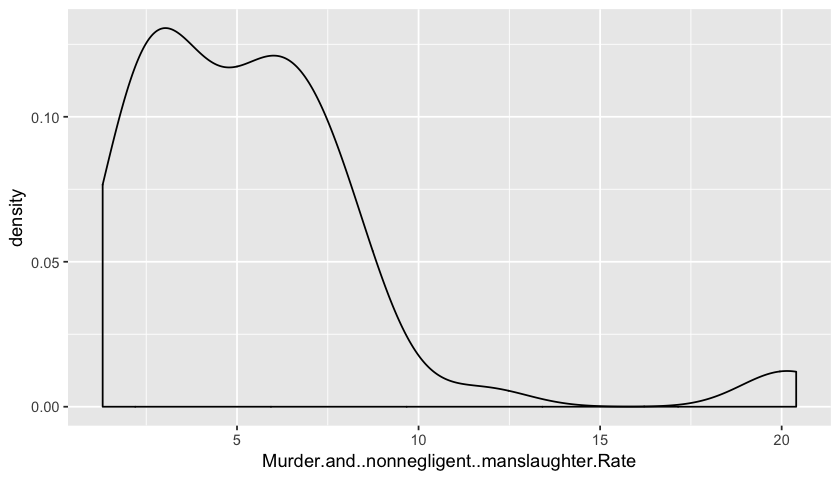

In [50]:
#create new variables for the levels of each crime rate 
#use equal widh of bins instead of equal frequency binning
crime$Murder.and..nonnegligent..manslaughter.level <- cut(crime$Murder.and..nonnegligent..manslaughter.Rate,
                                                          breaks = c(0, 2.775, 5.250, 6.775, 20.4),
                                                          labels=c("Low", "Medium", "High", "Very High"),
                                                          include.lowest=T)

ggplot(crime, aes(x=Murder.and..nonnegligent..manslaughter.Rate)) + geom_density()
#ggsave("murder_rate.png")

table(crime$Murder.and..nonnegligent..manslaughter.level)

crime$Rape.Rate.level <- cut(crime$Rape.Rate,
                             breaks = quantile(crime$Rape.Rate),
                             labels=c("Low", "Medium", "High", "Very High"),
                             include.lowest=T)
table(crime$Rape.Rate.level)

crime$Robbery.Rate.level <- cut(crime$Robbery.Rate,
                             breaks = c(0, 54.48, 80.40, 111.12, 510.90),
                             labels=c("Low", "Medium", "High", "Very High"),
                             include.lowest=T)

table(crime$Robbery.Rate.level)

crime$Aggravated.assault.Rate.level <- cut(crime$Aggravated.assault.Rate,
                                           breaks = quantile(crime$Aggravated.assault.Rate),
                                           labels=c("Low", "Medium", "High", "Very High"),
                                           include.lowest=T)
table(crime$Aggravated.assault.Rate.level)

crime$Burglary.Rate.level <- cut(crime$Burglary.Rate,
                                 breaks = quantile(crime$Burglary.Rate),
                                 labels=c("Low", "Medium", "High", "Very High"),
                                 include.lowest=T)
table(crime$Burglary.Rate.level)

crime$Larceny.theft.Rate.level <- cut(crime$Larceny.theft.Rate,
                                 breaks = quantile(crime$Larceny.theft.Rate),
                                 labels=c("Low", "Medium", "High", "Very High"),
                                 include.lowest=T)
table(crime$Larceny.theft.Rate.level)


crime$Motor.vehicle.theft.Rate.level <- cut(crime$Motor.vehicle.theft.Rate,
                                            breaks = quantile(crime$Motor.vehicle.theft.Rate),
                                            labels=c("Low", "Medium", "High", "Very High"),
                                           include.lowest=T)
table(crime$Motor.vehicle.theft.Rate.level)

=====================================================================================================================

## Question 10

Use the apriori algorithm to find frequent associations in your dataset. Try
at least 2 different levels of support (e.g. 5% and 20%) and confidence. Summarize your
findings (number of rules, length distribution).

**Answer:** I tried 3 different support levels {5%, 10%, 20%} with 2 different confidence level
{75%, 90%}. The results are all possible combinations are as follows:

**a) Support: 5% & Confidence: 75%**

For this scenario we have 446 rules, where most rules contain 3 variables - 2 on the lhs(X)
and 1 in the rhs(Y). The quality measures on the rules include support, condence and lift.
As we can see from the summary of quality measures gure, all the rules have a lift greater
than 1 which means that there is a good chance that the pattern we are observing is NOT
occurring just by chance.

In [54]:
crime_rules <- crime[,c(21:27)]

#support 5%, confidence 75%
rules_1 <- apriori(crime_rules,
                 parameter =list(support = 0.05, confidence=0.75))
summary(rules_1)

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
       0.75    0.1    1 none FALSE            TRUE       5    0.05      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 2 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[28 item(s), 52 transaction(s)] done [0.00s].
sorting and recoding items ... [28 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 2 3 4 5 6 done [0.00s].
writing ... [446 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


set of 446 rules

rule length distribution (lhs + rhs):sizes
  2   3   4   5   6 
  4 197 179  60   6 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  2.000   3.000   4.000   3.702   4.000   6.000 

summary of quality measures:
    support          confidence          lift           count       
 Min.   :0.05769   Min.   :0.7500   Min.   :2.786   Min.   : 3.000  
 1st Qu.:0.05769   1st Qu.:0.7500   1st Qu.:3.000   1st Qu.: 3.000  
 Median :0.05769   Median :0.8571   Median :3.429   Median : 3.000  
 Mean   :0.06795   Mean   :0.8822   Mean   :3.527   Mean   : 3.534  
 3rd Qu.:0.07692   3rd Qu.:1.0000   3rd Qu.:4.000   3rd Qu.: 4.000  
 Max.   :0.19231   Max.   :1.0000   Max.   :4.333   Max.   :10.000  

mining info:
        data ntransactions support confidence
 crime_rules            52    0.05       0.75

**b) Support: 5% & Confidence: 90%**

By increasing the confidence level to 90% we have a set of 216 rules, where most rules this
time contain 4 variables. We see an increase of the min value of lift to 3.74 and confidence
at 100%.

In [56]:
#support 5%, confidence 90%
rules_2 <- apriori(crime_rules,
                   parameter =list(support = 0.05, confidence=0.9))
summary(rules_2)

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.9    0.1    1 none FALSE            TRUE       5    0.05      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 2 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[28 item(s), 52 transaction(s)] done [0.00s].
sorting and recoding items ... [28 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 2 3 4 5 6 done [0.00s].
writing ... [216 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


set of 216 rules

rule length distribution (lhs + rhs):sizes
  3   4   5   6 
 63 103  44   6 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  3.000   3.000   4.000   3.968   4.000   6.000 

summary of quality measures:
    support          confidence      lift           count      
 Min.   :0.05769   Min.   :1    Min.   :3.714   Min.   :3.000  
 1st Qu.:0.05769   1st Qu.:1    1st Qu.:4.000   1st Qu.:3.000  
 Median :0.05769   Median :1    Median :4.000   Median :3.000  
 Mean   :0.06357   Mean   :1    Mean   :4.002   Mean   :3.306  
 3rd Qu.:0.05769   3rd Qu.:1    3rd Qu.:4.000   3rd Qu.:3.000  
 Max.   :0.13462   Max.   :1    Max.   :4.333   Max.   :7.000  

mining info:
        data ntransactions support confidence
 crime_rules            52    0.05        0.9

**c) Support: 10% & Confidence: 75%**

When we increase the level of support to 10% and keep condence 75% the set of rules is
26, i.e decreases even more. For this case most rules now have 3 variables, 2 in the lhs(X)
and 1 in the rhs(Y). We see a decrease of the min and max value of lift.

In [57]:
#support 10%, confidence 75%
rules_3 <- apriori(crime_rules,
                   parameter =list(support = 0.1, confidence=0.75))
summary(rules_3)

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
       0.75    0.1    1 none FALSE            TRUE       5     0.1      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 5 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[28 item(s), 52 transaction(s)] done [0.00s].
sorting and recoding items ... [28 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 2 3 4 done [0.00s].
writing ... [26 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


set of 26 rules

rule length distribution (lhs + rhs):sizes
 2  3  4 
 4 18  4 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
      2       3       3       3       3       4 

summary of quality measures:
    support         confidence          lift           count       
 Min.   :0.1154   Min.   :0.7500   Min.   :3.000   Min.   : 6.000  
 1st Qu.:0.1154   1st Qu.:0.7692   1st Qu.:3.077   1st Qu.: 6.000  
 Median :0.1154   Median :0.8286   Median :3.314   Median : 6.000  
 Mean   :0.1354   Mean   :0.8368   Mean   :3.347   Mean   : 7.038  
 3rd Qu.:0.1490   3rd Qu.:0.8571   3rd Qu.:3.429   3rd Qu.: 7.750  
 Max.   :0.1923   Max.   :1.0000   Max.   :4.000   Max.   :10.000  

mining info:
        data ntransactions support confidence
 crime_rules            52     0.1       0.75

**d) Support: 10% & Condence: 90%**


For this case we have only 4 rules and still most rules contain 3 variables. All lift values are
4 and confidence is 100%

In [58]:
#support 10%, confidence 90%
rules_4 <- apriori(crime_rules,
                   parameter =list(support = 0.1, confidence=0.9))
summary(rules_4)

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.9    0.1    1 none FALSE            TRUE       5     0.1      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 5 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[28 item(s), 52 transaction(s)] done [0.00s].
sorting and recoding items ... [28 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 2 3 4 done [0.00s].
writing ... [4 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


set of 4 rules

rule length distribution (lhs + rhs):sizes
3 4 
3 1 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   3.00    3.00    3.00    3.25    3.25    4.00 

summary of quality measures:
    support         confidence      lift       count    
 Min.   :0.1154   Min.   :1    Min.   :4   Min.   :6.0  
 1st Qu.:0.1154   1st Qu.:1    1st Qu.:4   1st Qu.:6.0  
 Median :0.1250   Median :1    Median :4   Median :6.5  
 Mean   :0.1250   Mean   :1    Mean   :4   Mean   :6.5  
 3rd Qu.:0.1346   3rd Qu.:1    3rd Qu.:4   3rd Qu.:7.0  
 Max.   :0.1346   Max.   :1    Max.   :4   Max.   :7.0  

mining info:
        data ntransactions support confidence
 crime_rules            52     0.1        0.9

**e) Support: 20%**

If we gonne increase the support to 20% than for dierent level of support we will have NO
rule.
Since the number of items is small in this data, i.e no rare events, we should keep the level
of support high enough.

=====================================================================================================================

## Question 11

Pick the combination of support and condence that seems to produce the
best results. Report the 5 rules with highest condence and explain your ndings.


**Answer:** Based on the findings of problem 10, I would prefer a high level of support. So I
will pick support=10% and confidence=75% even though there is no much difference with
confidence=90%. For this case the 5 rules with highest confidence values are as below:

In [60]:
inspect(head((sort(rules_3, by="confidence")), n=5))

    lhs                                     rhs                                    support confidence     lift count
[1] {Rape.Rate.level=Low,                                                                                           
     Larceny.theft.Rate.level=Low}       => {Burglary.Rate.level=Low}            0.1346154  1.0000000 4.000000     7
[2] {Rape.Rate.level=Low,                                                                                           
     Aggravated.assault.Rate.level=Low}  => {Burglary.Rate.level=Low}            0.1153846  1.0000000 4.000000     6
[3] {Rape.Rate.level=Low,                                                                                           
     Motor.vehicle.theft.Rate.level=Low} => {Burglary.Rate.level=Low}            0.1346154  1.0000000 4.000000     7
[4] {Rape.Rate.level=Low,                                                                                           
     Larceny.theft.Rate.level=Low,                              

The first 4 rules are of length 3. They show that if a state has low level of Rape.Rate associ-
ated with low level of Larceny.theft.Rate, or low level Aggravated.assault.Rate or low level of
Motor.vehicle.theft.Rate or a combination of low level of Larceny.theft.Rate AND low level
of Motor.vehicle.theft.Rate then that state will have low levels of Burglary.Rate. The fifth
rule is a combination of length four and claims that if a state has low levels of Burglary.Rate
and low level of Larceny.theft.Rate then it will have low level of Motor.vehicle.theft.Rate.

=====================================================================================================================

## Question 12

Filter your resulting rules to find rules that have Murder and nonnegligent
manslaughter Rate = Very High on the right hand side. How many such rules exist? Report
5 most confident and comment on results.


**Answer:** If we set support=10% and confidence=75%, there exist only one rule that has
Murder and nonnegligent manslaughter Rate = Very High on the right hand side and that
is:

In [62]:
murder_rules <- apriori(crime_rules,
                  parameter =list(support = 0.1,
                                  confidence=0.75),
                  appearance=list(rhs=c("Murder.and..nonnegligent..manslaughter.level=Very High"),
                                  default="lhs"))
summary(murder_rules)

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
       0.75    0.1    1 none FALSE            TRUE       5     0.1      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 5 

set item appearances ...[1 item(s)] done [0.00s].
set transactions ...[28 item(s), 52 transaction(s)] done [0.00s].
sorting and recoding items ... [28 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 2 3 4 done [0.00s].
writing ... [1 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


set of 1 rules

rule length distribution (lhs + rhs):sizes
3 
1 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
      3       3       3       3       3       3 

summary of quality measures:
    support         confidence          lift           count  
 Min.   :0.1154   Min.   :0.8571   Min.   :3.429   Min.   :6  
 1st Qu.:0.1154   1st Qu.:0.8571   1st Qu.:3.429   1st Qu.:6  
 Median :0.1154   Median :0.8571   Median :3.429   Median :6  
 Mean   :0.1154   Mean   :0.8571   Mean   :3.429   Mean   :6  
 3rd Qu.:0.1154   3rd Qu.:0.8571   3rd Qu.:3.429   3rd Qu.:6  
 Max.   :0.1154   Max.   :0.8571   Max.   :3.429   Max.   :6  

mining info:
        data ntransactions support confidence
 crime_rules            52     0.1       0.75

In [63]:
murder_rulesConf <- sort(murder_rules, by="confidence")
inspect(head(lhs(murder_rulesConf), n=5))

    items                                    
[1] {Aggravated.assault.Rate.level=Very High,
     Burglary.Rate.level=Very High}          


=====================================================================================================================

## Question 13

Problem 13. Write a conclusion (at most 18 sentences!) summarizing the most important
findings of the assignment. What did we learn about the dataset? Given your results, in
which state would you rather live (safest)?


Answer: In this assignment we learned how to cluster the data using hierarchical clustering
and k-means. Also we used different measures to see the performance of different algorithms
and their suggestion for the optimal number of clusters. Visualization of clusters in the
dendrogram and through principal component analysis suggest that Disrict of Columbia and
Puerto Rico are outliers in the data, so we should exclude them for k-means to have unbiased
clustering results. Using the association rule mining we found different sets of rules with
different levels of support and confidence. Since the number of items in this data is not
high, the events happen frequently which tells us to keep the support level high enough. For
support=10% the 5 rules with the highest confidence level have low level of Burglary.Rate
in their rhs. In the beginning of this assignment I claimed that I would prefer to live in a
state with low levels of violent crime since I value more the value of life than that the value
of properties. Based only on violent crime rate I chose Puerto Rico as the ideal state to live
but I was wrong. Through out the completion of this assignment I realized that the value
of Murder.and..nonnegligent..manslaughter.Rate for Puerto Rico is almost the same as DC
which has the highest rate in the nation and was classified as the most dangerous state to
live. Based on all the analysis results of this assignment, I would prefer to live in the New
Hampshire, which was also the other most peaceful state to live. Also it has the lowest rate
of Murder.and..nonnegligent..manslaughter.Rate.